# **01_EDA_Raw: Data Diagnosis**
- **Goal**: This notebook is a diagnostic investigation of the raw data files. We are acting as data detectives, identifying and documenting problems. This analysis will justify the necessity of the data preparation steps that will be performed by "Person 2" (in the next notebook). We will not be cleaning any data here, only proving that it needs to be cleaned.

In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [2]:
# Thiết lập style cho biểu đồ seaborn
sns.set_style('whitegrid')

In [3]:
# Cell 2: Tải (Load) và Gộp (Merge) Dữ liệu

# Đường dẫn tới thư mục chứa data
data_path = "data/" 

# Tự động tìm tất cả các file .csv trong thư mục data/
all_csv_files = glob.glob(os.path.join(data_path, "*.csv"))

# Tạo một list rỗng để chứa các DataFrames con
list_of_dfs = []

print(f"Tìm thấy {len(all_csv_files)} file CSV. Bắt đầu đọc...")

for file_path in all_csv_files:
    filename = os.path.basename(file_path)
    
    # Bỏ qua file News_Final.csv
    if filename == "News_Final.csv":
        print(f"[!] Bỏ qua file {filename}, sẽ xử lý riêng nếu cần.")
        continue
        
    try:
        df_temp = pd.read_csv(file_path)
        
        # Tách tên file để lấy Source và Topic
        name_only = filename.replace('.csv', '') 
        parts = name_only.split('_') 
        
        if len(parts) == 2:
            df_temp['Source'] = parts[0]
            df_temp['Topic'] = parts[1]
            list_of_dfs.append(df_temp)
        else:
            print(f"[!] Bỏ qua file {filename} vì tên không đúng định dạng 'Source_Topic.csv'")
            
    except Exception as e:
        print(f"[LỖI] Không thể đọc file {file_path}: {e}")

# Gộp tất cả các DataFrame trong list lại
if list_of_dfs:
    df = pd.concat(list_of_dfs, ignore_index=True)
    print(f"\n[THÀNH CÔNG] Đã gộp {len(list_of_dfs)} file.")
    print(f"DataFrame tổng hợp có: {df.shape[0]} dòng và {df.shape[1]} cột.")
    
    # Hiển thị 5 dòng đầu tiên để kiểm tra
    print("\n5 dòng dữ liệu đầu tiên sau khi gộp:")
    print(df.head())
else:
    print("\n[LỖI] Không gộp được file nào. Vui lòng kiểm tra lại thư mục 'data/'.")

Tìm thấy 13 file CSV. Bắt đầu đọc...
[!] Bỏ qua file News_Final.csv, sẽ xử lý riêng nếu cần.

[THÀNH CÔNG] Đã gộp 12 file.
DataFrame tổng hợp có: 260515 dòng và 147 cột.

5 dòng dữ liệu đầu tiên sau khi gộp:
   IDLink  TS1  TS2  TS3  TS4  TS5  TS6  TS7  TS8  TS9  ...  TS137  TS138  \
0     1.0   -1   -1   -1   -1   -1   -1   -1   -1    7  ...     13     13   
1     2.0   -1   -1   -1   -1   -1   -1   -1   -1    3  ...     42     42   
2     3.0   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...     98     98   
3     4.0   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...      7      7   
4     5.0   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...     34     34   

   TS139  TS140  TS141  TS142  TS143  TS144    Source    Topic  
0     13     13     13     13     13     13  Facebook  Economy  
1     42     42     42     42     42     42  Facebook  Economy  
2     98     98     98     98     98     98  Facebook  Economy  
3      7      7      7      7      7      7  Facebook  Economy  
4   

In [4]:
# Cell 3: Tiền xử lý - Xử lý Giá trị thiếu (NaN)

print("Thông tin tổng quan của dữ liệu (trước khi xử lý -1):")
df.info(verbose=False) # verbose=False để rút gọn output

# Lấy danh sách các cột 'TS'
ts_columns = [col for col in df.columns if col.startswith('TS')]
print(f"\nTìm thấy {len(ts_columns)} cột 'TS'.")

print("Đang thay thế giá trị -1 trong các cột TS bằng NaN...")
df[ts_columns] = df[ts_columns].replace(-1, np.nan)
print("Đã thay thế xong.")

# In ra 5 cột có nhiều giá trị NaN nhất để kiểm tra
print("\n5 cột có nhiều giá trị thiếu (NaN) nhất:")
print(df.isnull().sum().sort_values(ascending=False).head(5))

Thông tin tổng quan của dữ liệu (trước khi xử lý -1):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260515 entries, 0 to 260514
Columns: 147 entries, IDLink to Topic
dtypes: float64(1), int64(144), object(2)
memory usage: 292.2+ MB

Tìm thấy 144 cột 'TS'.
Đang thay thế giá trị -1 trong các cột TS bằng NaN...
Đã thay thế xong.

5 cột có nhiều giá trị thiếu (NaN) nhất:
TS1    199379
TS2    180075
TS3    166684
TS4    144759
TS5    143497
dtype: int64


In [5]:
# Cell 4: Tiền xử lý - Xử lý Trùng lặp & Cột không cần thiết

# 4.1. Xử lý Trùng lặp (Duplicates)
duplicate_rows = df.duplicated().sum()
print(f"Tìm thấy {duplicate_rows} dòng bị trùng lặp.")
if duplicate_rows > 0:
    df = df.drop_duplicates(keep='first')
    print(f"Đã xóa {duplicate_rows} dòng trùng lặp. Số dòng còn lại: {df.shape[0]}")

# 4.2. Xử lý cột không cần thiết
if 'IDLink' in df.columns:
    print("Đang xóa cột 'IDLink'...")
    df = df.drop(columns=['IDLink'])
    print("Đã xóa cột 'IDLink'.")
else:
    print("Không tìm thấy cột 'IDLink'.")
    
print("\nDataFrame sau khi làm sạch:")
print(df.head())

Tìm thấy 0 dòng bị trùng lặp.
Đang xóa cột 'IDLink'...
Đã xóa cột 'IDLink'.

DataFrame sau khi làm sạch:
   TS1  TS2  TS3  TS4  TS5  TS6  TS7  TS8  TS9  TS10  ...  TS137  TS138  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  7.0   7.0  ...   13.0   13.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  3.0   3.0  ...   42.0   42.0   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  ...   98.0   98.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  ...    7.0    7.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  ...   34.0   34.0   

   TS139  TS140  TS141  TS142  TS143  TS144    Source    Topic  
0   13.0   13.0   13.0   13.0   13.0   13.0  Facebook  Economy  
1   42.0   42.0   42.0   42.0   42.0   42.0  Facebook  Economy  
2   98.0   98.0   98.0   98.0   98.0   98.0  Facebook  Economy  
3    7.0    7.0    7.0    7.0    7.0    7.0  Facebook  Economy  
4   34.0   34.0   34.0   34.0   34.0   34.0  Facebook  Economy  

[5 rows x 146 columns]


Đang vẽ biểu đồ phân bổ Source và Topic...


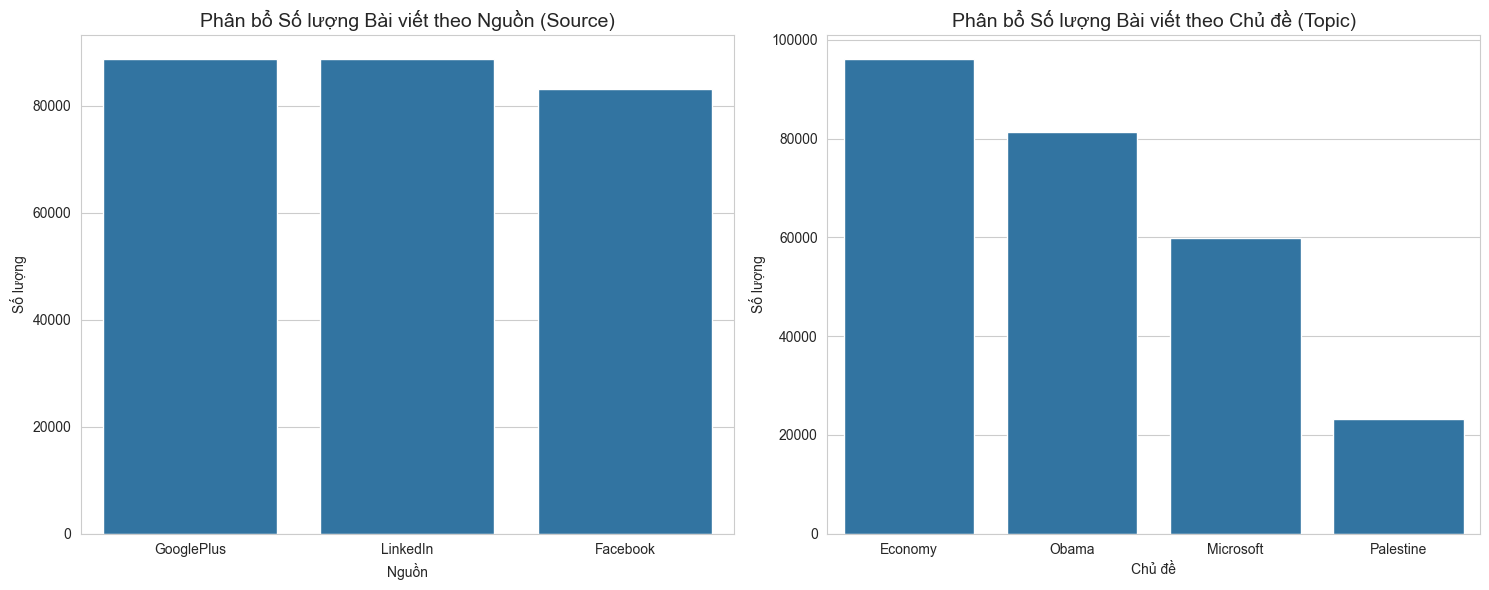

In [6]:
# Cell 5: Trực quan hóa - Biến Phân loại (Source & Topic)

print("Đang vẽ biểu đồ phân bổ Source và Topic...")
plt.figure(figsize=(15, 6))

# Biểu đồ 1: Phân bổ theo Nguồn (Source)
plt.subplot(1, 2, 1) # 1 hàng, 2 cột, vị trí 1
sns.countplot(data=df, x='Source', order=df['Source'].value_counts().index)
plt.title('Phân bổ Số lượng Bài viết theo Nguồn (Source)', fontsize=14)
plt.xlabel('Nguồn')
plt.ylabel('Số lượng')

# Biểu đồ 2: Phân bổ theo Chủ đề (Topic)
plt.subplot(1, 2, 2) # 1 hàng, 2 cột, vị trí 2
sns.countplot(data=df, x='Topic', order=df['Topic'].value_counts().index)
plt.title('Phân bổ Số lượng Bài viết theo Chủ đề (Topic)', fontsize=14)
plt.xlabel('Chủ đề')
plt.ylabel('Số lượng')

plt.tight_layout() # Tự động điều chỉnh
plt.show() # Hiển thị biểu đồ

In [7]:
# Cell 6: Feature Engineering (Tạo đặc trưng mới)

print("Đang tạo các đặc trưng mới từ 144 cột TS...")

df['TS_mean'] = df[ts_columns].mean(axis=1)
df['TS_std'] = df[ts_columns].std(axis=1)
df['TS_max'] = df[ts_columns].max(axis=1)
df['TS_non_missing_count'] = df[ts_columns].count(axis=1) # Đếm số giá trị không phải NaN

print("Đã tạo xong 4 đặc trưng mới. Kiểm tra 5 dòng đầu:")
print(df[['Source', 'Topic', 'TS_mean', 'TS_std', 'TS_max', 'TS_non_missing_count']].head())

Đang tạo các đặc trưng mới từ 144 cột TS...


C:\Users\LapTop\AppData\Local\Temp\ipykernel_7920\595608714.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TS_mean'] = df[ts_columns].mean(axis=1)
C:\Users\LapTop\AppData\Local\Temp\ipykernel_7920\595608714.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TS_std'] = df[ts_columns].std(axis=1)
C:\Users\LapTop\AppData\Local\Temp\ipykernel_7920\595608714.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider jo

Đã tạo xong 4 đặc trưng mới. Kiểm tra 5 dòng đầu:
     Source    Topic    TS_mean     TS_std  TS_max  TS_non_missing_count
0  Facebook  Economy  11.058824   1.808477    13.0                   136
1  Facebook  Economy  30.492647  14.050700    42.0                   136
2  Facebook  Economy  87.556701  10.076757    98.0                    97
3  Facebook  Economy   5.388350   0.769938     7.0                   103
4  Facebook  Economy  30.175258   4.210627    34.0                    97


C:\Users\LapTop\AppData\Local\Temp\ipykernel_7920\595608714.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TS_non_missing_count'] = df[ts_columns].count(axis=1) # Đếm số giá trị không phải NaN


Đang vẽ biểu đồ phân bổ cho các đặc trưng mới...


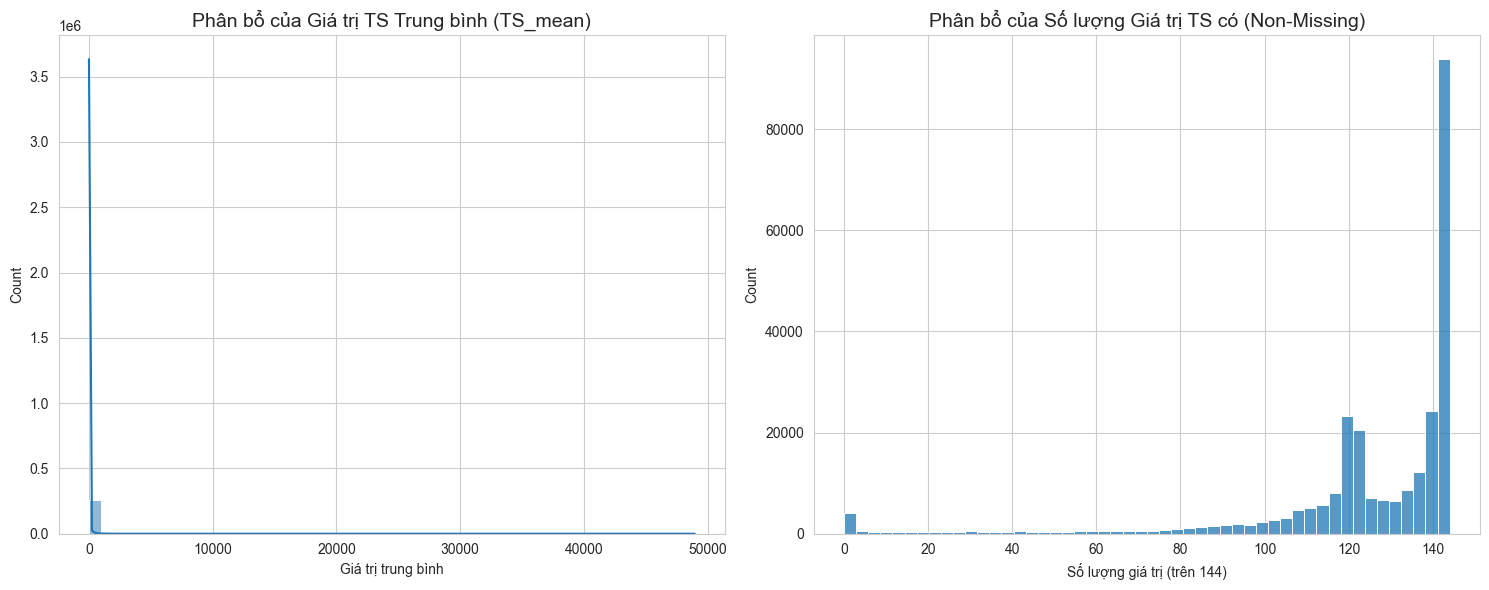

In [8]:
# Cell 7: Trực quan hóa - Biến Số (Đặc trưng mới)

print("Đang vẽ biểu đồ phân bổ cho các đặc trưng mới...")
plt.figure(figsize=(15, 6))

# Biểu đồ 1: Phân bổ của TS_mean
plt.subplot(1, 2, 1)
sns.histplot(df['TS_mean'].dropna(), kde=True, bins=50) # dropna() để tránh lỗi khi vẽ
plt.title('Phân bổ của Giá trị TS Trung bình (TS_mean)', fontsize=14)
plt.xlabel('Giá trị trung bình')

# Biểu đồ 2: Phân bổ của TS_non_missing_count
plt.subplot(1, 2, 2)
sns.histplot(df['TS_non_missing_count'], bins=50, kde=False)
plt.title('Phân bổ của Số lượng Giá trị TS có (Non-Missing)', fontsize=14)
plt.xlabel('Số lượng giá trị (trên 144)')

plt.tight_layout()
plt.show()

Đang vẽ biểu đồ Boxplot (TS_mean theo Topic)...


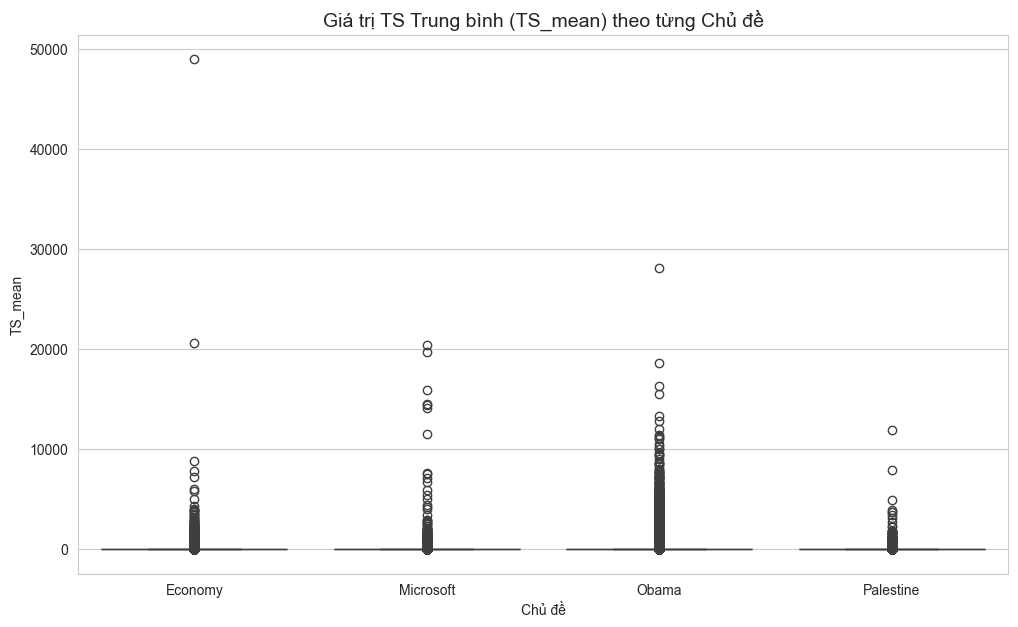

In [9]:
# Cell 8: Trực quan hóa - Đa biến (Boxplot)

print("Đang vẽ biểu đồ Boxplot (TS_mean theo Topic)...")
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Topic', y='TS_mean')
plt.title('Giá trị TS Trung bình (TS_mean) theo từng Chủ đề', fontsize=14)
plt.xlabel('Chủ đề')
plt.ylabel('TS_mean')
plt.show()

Đang vẽ biểu đồ Countplot (Topic theo Source)...


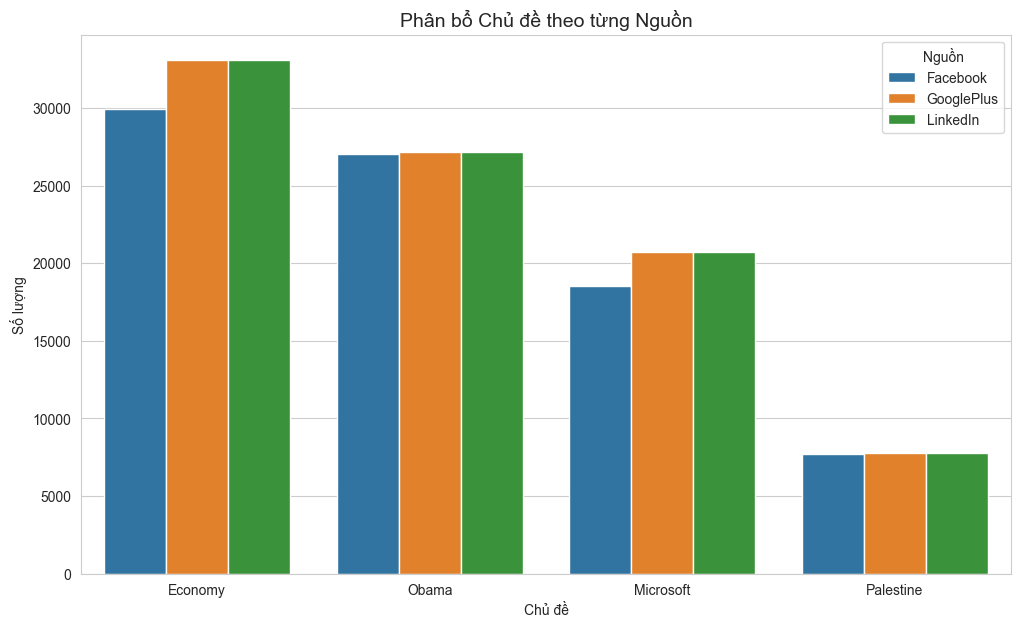

In [10]:
# Cell 9: Trực quan hóa - Đa biến (Countplot xếp chồng)

print("Đang vẽ biểu đồ Countplot (Topic theo Source)...")
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Topic', hue='Source', order=df['Topic'].value_counts().index)
plt.title('Phân bổ Chủ đề theo từng Nguồn', fontsize=14)
plt.xlabel('Chủ đề')
plt.ylabel('Số lượng')
plt.legend(title='Nguồn')
plt.show()

Đang vẽ biểu đồ nhiệt tương quan...


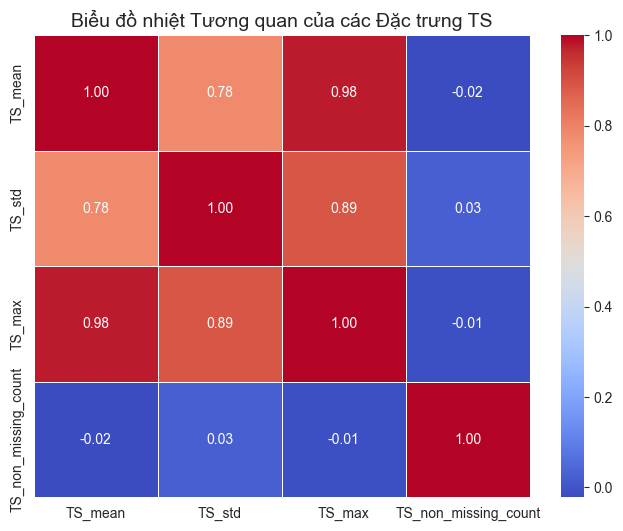

In [12]:
# Cell 10: Trực quan hóa - Biểu đồ nhiệt Tương quan

print("Đang vẽ biểu đồ nhiệt tương quan...")

# Chọn các cột số vừa tạo
corr_features = ['TS_mean', 'TS_std', 'TS_max', 'TS_non_missing_count']
corr_matrix = df[corr_features].corr()

# Vẽ biểu đồ nhiệt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# annot=True: Hiển thị số
# cmap='coolwarm': Dùng thang màu đỏ-xanh
# fmt='.2f': Hiển thị 2 chữ số thập phân
plt.title('Biểu đồ nhiệt Tương quan của các Đặc trưng TS', fontsize=14)
plt.show()